In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from functions import loadDataFrame

### Load Data

In [13]:
df = loadDataFrame("Ali/eksperiment1.csv", convertToInt=True)
display(df.head())

,wait,correctSequence,userInput
0,0.5,"[47, 19, 81, 42, 27, 86, 40, 92, 58, 49, 56, 9...","[25, 23, 81, 47, 49, 27, 33, 81, 85, 94, 34, 1..."
1,0.5,"[51, 64, 75, 80, 25, 27, 72, 28, 59, 97, 85, 7...","[14, 45, 49, 88, 75, 70, 14, 28, 56, 34, 67, 3..."
2,0.5,"[76, 14, 60, 88, 37, 77, 90, 64, 99, 89, 72, 8...","[41, 70, 76, 14, 60, 76, 34, 21, 54, 76, 94, 2..."
3,0.5,"[94, 61, 50, 95, 80, 49, 64, 23, 99, 24, 66, 1...","[37, 35, 94, 95, 91, 90, 64, 61, 65, 35, 83, 2..."
4,1.0,"[67, 96, 28, 95, 42, 73, 74, 83, 66, 82, 20, 4...","[52, 33, 96, 97, 86, 82, 72, 71, 45, 56, 23, 9..."


### Plot accuracy over each wait time

[np.float64(1.0), np.float64(2.25), np.float64(2.5), np.float64(2.0)]


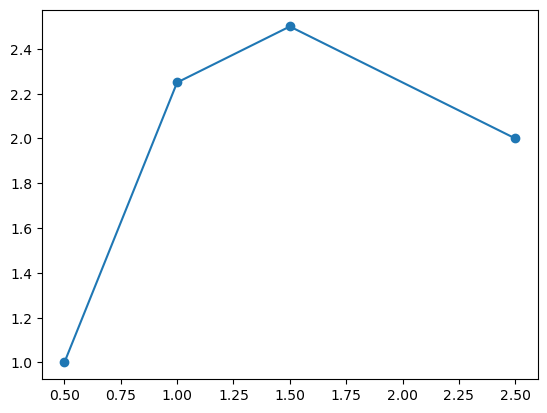

In [14]:
accuracies = []
wait_times = df['wait'].unique()
for wait in wait_times:
    subset = df[df['wait'] == wait]
    correct_counts = []
    for index, row in subset.iterrows():
        user_input = [str(i) for i in row['userInput'] if i != '']
        correct_sequence = [str(i) for i in row['correctSequence'] if i != '']
        correct_count = sum(1 for ui, ci in zip(np.unique(correct_sequence), np.unique(user_input)) if ui == ci)
        correct_counts.append(correct_count)
    average_accuracy = np.mean(correct_counts)
    
    accuracies.append(average_accuracy)  # Assuming max score is 10


print(accuracies)
plt.plot(wait_times, accuracies, marker='o')